#NAIVE BAYES

In [2]:
import pandas as pd
data = pd.read_excel('new dataset.xlsx')
print(data)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Read the dataset from Excel
data = pd.read_excel('newdataset.xlsx')

# Shuffle the dataset for generalization
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features (x) and target (y)
x = shuffled_data.iloc[1:, 1:6]
y = shuffled_data.iloc[1:, 6]

# Calculate Pearson correlation matrix
correlation_matrix = x.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.7)

# Train the Support Vector Classifier
model = SVC()
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate the model
classification_rep = classification_report(y_test, predictions)
print("Classification Report:\n", classification_rep)


Correlation Matrix:
                          Air temperature_[K]  Rotational speed_[rpm]  \
Air temperature_[K]                 1.000000               -0.101854   
Rotational speed_[rpm]             -0.101854                1.000000   
Torque_[Nm]                         0.028020               -0.823738   
Tool wear_[min]                    -0.137497                0.018183   
Process temperature_[K]             0.842869               -0.037526   

                         Torque_[Nm]  Tool wear_[min]  Process temperature_[K]  
Air temperature_[K]         0.028020        -0.137497                 0.842869  
Rotational speed_[rpm]     -0.823738         0.018183                -0.037526  
Torque_[Nm]                 1.000000        -0.113919                -0.013952  
Tool wear_[min]            -0.113919         1.000000                -0.078890  
Process temperature_[K]    -0.013952        -0.078890                 1.000000  
Classification Report:
               precision    recall  f

In [ ]:
import joblib
joblib.dump(model, 'newmodel.joblib')

['newmodel.joblib']

In [ ]:
# x=data[["Air temperature_[K]","Process temperature_[K]","Rotational speed_[rpm]",
#         "Torque_[Nm]","Tool wear_[min]"]]
x = data.iloc[1:,1:6]
print(x)

       Air temperature_[K]  Rotational speed_[rpm]  Torque_[Nm]  \
1               298.100000                    1498    49.400000   
2               298.200000                    1433    39.500000   
3               298.200000                    1408    40.000000   
4               298.100000                    1425    41.900000   
5               298.100000                    1558    42.400000   
...                    ...                     ...          ...   
57911           300.449902                    2117    18.578445   
57912           300.132027                    2144    18.169749   
57913           300.631863                    2102    18.812395   
57914           298.433410                    2187    18.157433   
57915           299.289070                    1992    21.161303   

       Tool wear_[min]  Process temperature_[K]  
1                    5               308.500000  
2                    7               308.600000  
3                    9               308.7000

In [ ]:
x.corr()

,Air temperature_[K],Rotational speed_[rpm],Torque_[Nm],Tool wear_[min],Process temperature_[K]
Air temperature_[K],1.000000,-0.101870,0.028024,-0.137544,0.842863
Rotational speed_[rpm],-0.101870,1.000000,-0.823739,0.018172,-0.037536
Torque_[Nm],0.028024,-0.823739,1.000000,-0.113926,-0.013952
Tool wear_[min],-0.137544,0.018172,-0.113926,1.000000,-0.078935
Process temperature_[K],0.842863,-0.037536,-0.013952,-0.078935,1.000000


In [ ]:
y=data.iloc[1:,6]
print(y)

1         NF
2         NF
3         NF
4         NF
5         NF
        ... 
57911    TWF
57912    TWF
57913    TWF
57914    TWF
57915    TWF
Name: Failure_Type, Length: 57915, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [ ]:
print(x)

[[-1.35406978  0.14308996  0.09387316 -2.00371741 -1.40129086]
 [-1.29855746 -0.1502469  -0.64290247 -1.97496047 -1.32114524]
 [-1.29855746 -0.26306877 -0.60569158 -1.94620353 -1.24099962]
 ...
 [ 0.05142588  2.86886638 -2.18251087  1.24581676  1.11396078]
 [-1.16898619  3.25246074 -2.23125429  1.00138277 -0.50960176]
 [-0.69398954  2.37245014 -2.00770094  1.11641053 -0.6907534 ]]


In [ ]:
#before performing oversampling
# from imblearn.over_sampling import ADASYN
# from collections import Counter
# counter = Counter(y)
# print("Before",counter)


Before Counter({'NF': 9651, 'HDF': 112, 'PF': 95, 'OF': 78, 'TWF': 45, 'RF': 18})


In [ ]:
#after performing oversampling
# ada = ADASYN(random_state = 130)
# x_new_ada,y_new_ada = ada.fit_resample(x,y)
# counter = Counter(y_new_ada)
# print("After",counter)

After Counter({'HDF': 9688, 'NF': 9651, 'RF': 9648, 'PF': 9647, 'OF': 9645, 'TWF': 9637})


In [ ]:
# x_new_ada.to_excel("demo1.xlsx")

In [ ]:
# y_new_ada.to_excel("demo2.xlsx")

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model=model.fit(xtrain,ytrain)

In [ ]:
op=model.predict([[298.9,308.1,1281,60.7,42.8]])
print(op)

['PF']


In [ ]:
# op=model.predict([[298.9,308.1,1281,60.7,214]])
op=model.predict(xtest)
print(op)
# if op ==0:
#   print("No failure")
# else:
#   print("failure")

['OF' 'RF' 'RF' ... 'TWF' 'RF' 'RF']


In [ ]:
import joblib
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,op)
print(cr)

              precision    recall  f1-score   support

         HDF       0.78      0.95      0.86      2964
          NF       0.66      0.42      0.51      2807
          OF       0.78      0.92      0.84      2921
          PF       0.88      0.76      0.82      2889
          RF       0.60      0.62      0.61      2910
         TWF       0.85      0.89      0.87      2884

    accuracy                           0.76     17375
   macro avg       0.76      0.76      0.75     17375
weighted avg       0.76      0.76      0.75     17375



In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(ytest,op)
print(cm)

[[2715    0  114   60    0    0]
 [  97 1238   93  180 1040  188]
 [  26    0 2705   41   37  103]
 [ 243    0  312 2187  150    0]
 [ 353  646    0    0 1807  135]
 [   0    0  243   14   44 2604]]


In [ ]:
# Tool Wear Failure
# Overstrain Failure
# Random Failure
# No Failure
# Heat Dissipation Failure
# Power Failure

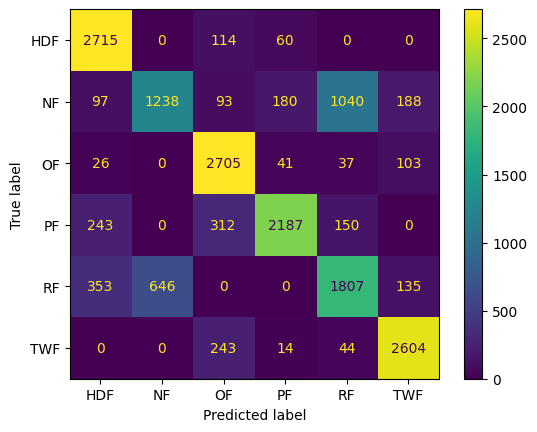

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest,op)
print(score)

0.7605179856115107


In [ ]:
print(score*100)

75.86325966850829


#SVM

In [ ]:
import pandas as pd
data = pd.read_excel('newdataset.xlsx')
print(data)

       SL.No  Air temperature_[K]  Rotational speed_[rpm]  Torque_[Nm]  \
0       1784           298.300000                    2886     3.800000   
1        463           297.400000                    2874     4.200000   
2         50           298.900000                    2861     4.600000   
3        847           296.400000                    2833     5.600000   
4       4296           301.800000                    2825     5.800000   
...      ...                  ...                     ...          ...   
57911  37246           299.804054                    1204    76.548179   
57912  37315           300.260142                    1201    76.587838   
57913  37277           300.298573                    1200    76.591180   
57914  37311           300.377017                    1200    76.598002   
57915   7763           300.400000                    1200    76.600000   

       Tool wear_[min]  Process temperature_[K] Failure_Type  
0                   57               308.000000 

In [ ]:
x = data.iloc[1:,1:6]
print(x)

       Air temperature_[K]  Rotational speed_[rpm]  Torque_[Nm]  \
1               297.400000                    2874     4.200000   
2               298.900000                    2861     4.600000   
3               296.400000                    2833     5.600000   
4               301.800000                    2825     5.800000   
5               301.500000                    2760     8.000000   
...                    ...                     ...          ...   
57911           299.804054                    1204    76.548179   
57912           300.260142                    1201    76.587838   
57913           300.298573                    1200    76.591180   
57914           300.377017                    1200    76.598002   
57915           300.400000                    1200    76.600000   

       Tool wear_[min]  Process temperature_[K]  
1                  118               308.700000  
2                  143               309.100000  
3                  213               307.4000

In [ ]:
y=data.iloc[1:,6]
print(y)

1        PF
2        PF
3        PF
4        PF
5        PF
         ..
57911    PF
57912    PF
57913    PF
57914    PF
57915    PF
Name: Failure_Type, Length: 57915, dtype: object


#correlation matrix

In [ ]:
# Calculate Pearson correlation matrix
correlation_matrix = x.corr()
# x.corr()
# Print the correlation matrix
print(correlation_matrix)

                         Air temperature_[K]  Rotational speed_[rpm]  \
Air temperature_[K]                 1.000000               -0.101763   
Rotational speed_[rpm]             -0.101763                1.000000   
Torque_[Nm]                         0.027959               -0.823743   
Tool wear_[min]                    -0.137522                0.018326   
Process temperature_[K]             0.842863               -0.037345   

                         Torque_[Nm]  Tool wear_[min]  Process temperature_[K]  
Air temperature_[K]         0.027959        -0.137522                 0.842863  
Rotational speed_[rpm]     -0.823743         0.018326                -0.037345  
Torque_[Nm]                 1.000000        -0.114001                -0.014054  
Tool wear_[min]            -0.114001         1.000000                -0.078930  
Process temperature_[K]    -0.014054        -0.078930                 1.000000  


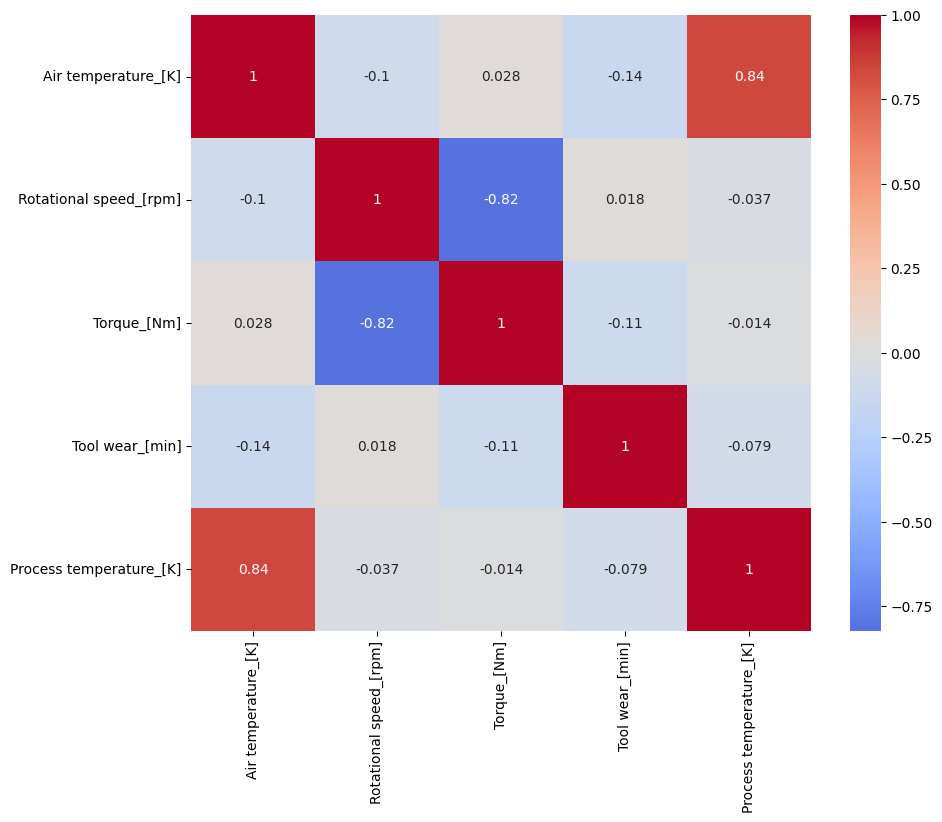

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
y=data.iloc[1:,6]
print(y)

1        PF
2        PF
3        PF
4        PF
5        PF
         ..
57911    PF
57912    PF
57913    PF
57914    PF
57915    PF
Name: Failure_Type, Length: 57915, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [ ]:
print(x)

[[-1.74265292  6.3551698  -3.27035284 -0.37892857 -1.2410276 ]
 [-0.90996918  6.29648165 -3.24058134 -0.01947474 -0.9204404 ]
 [-2.29777541  6.17007643 -3.16615257  0.98699595 -2.28293601]
 ...
 [-0.13358999 -1.20205694  2.11763333 -2.01803799  0.9895686 ]
 [-0.0900436  -1.20205694  2.11814103 -2.03241614  1.06200678]
 [-0.07728544 -1.20205694  2.11828977 -2.03241614  1.08322963]]


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model=model.fit(xtrain,ytrain)

In [ ]:
op=model.predict(xtest)
print(op)

['RF' 'PF' 'PF' ... 'NF' 'OF' 'RF']


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,op)
print(cr)

              precision    recall  f1-score   support

         HDF       0.98      1.00      0.99      2947
          NF       0.98      0.77      0.86      2832
          OF       0.96      1.00      0.98      2956
          PF       0.99      1.00      0.99      2820
          RF       0.87      0.99      0.92      2907
         TWF       0.95      0.96      0.96      2913

    accuracy                           0.95     17375
   macro avg       0.96      0.95      0.95     17375
weighted avg       0.96      0.95      0.95     17375



In [ ]:
import joblib
joblib.dump(model, 'svc_model.joblib')

['svc_model.joblib']

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(ytest,op)
print(cm)

[[2935    0    0    6    0    0]
 [  51 2206   31   28  457  147]
 [   6    0 2861    0    0    0]
 [   0    0    0 2867    0    0]
 [   0   57    0    0 2835    6]
 [   0    1   85    0   15 2781]]


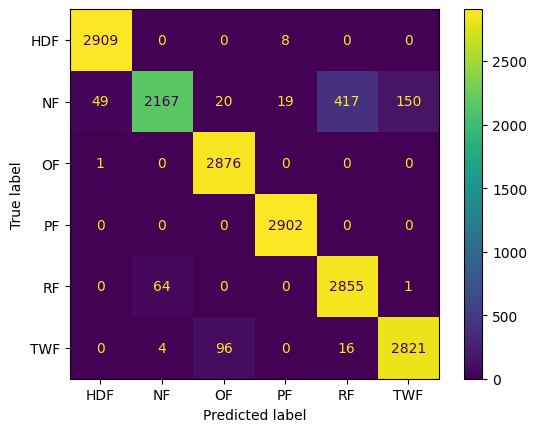

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

       SL.No  Air temperature_[K]  Rotational speed_[rpm]  Torque_[Nm]  \
0       1784           298.300000                    2886     3.800000   
1        463           297.400000                    2874     4.200000   
2         50           298.900000                    2861     4.600000   
3        847           296.400000                    2833     5.600000   
4       4296           301.800000                    2825     5.800000   
...      ...                  ...                     ...          ...   
57911  37246           299.804054                    1204    76.548179   
57912  37315           300.260142                    1201    76.587838   
57913  37277           300.298573                    1200    76.591180   
57914  37311           300.377017                    1200    76.598002   
57915   7763           300.400000                    1200    76.600000   

       Tool wear_[min]  Process temperature_[K] Failure_Type  
0                   57               308.000000 

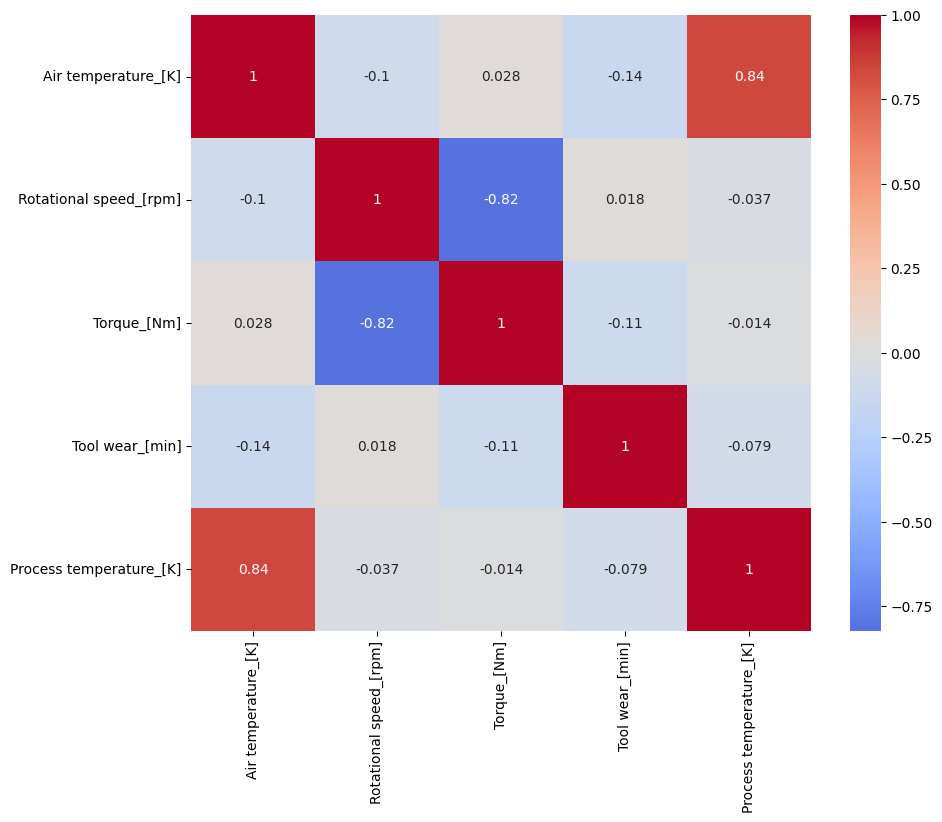

1        PF
2        PF
3        PF
4        PF
5        PF
         ..
57911    PF
57912    PF
57913    PF
57914    PF
57915    PF
Name: Failure_Type, Length: 57915, dtype: object
[[-1.74265292  6.3551698  -3.27035284 -0.37892857 -1.2410276 ]
 [-0.90996918  6.29648165 -3.24058134 -0.01947474 -0.9204404 ]
 [-2.29777541  6.17007643 -3.16615257  0.98699595 -2.28293601]
 ...
 [-0.13358999 -1.20205694  2.11763333 -2.01803799  0.9895686 ]
 [-0.0900436  -1.20205694  2.11814103 -2.03241614  1.06200678]
 [-0.07728544 -1.20205694  2.11828977 -2.03241614  1.08322963]]


NameError: name 'op' is not defined

In [ ]:
import pandas as pd
data = pd.read_excel('newdataset.xlsx')
print(data)
x = data.iloc[1:,1:6]
print(x)
y=data.iloc[1:,6]
print(y)
# Calculate Pearson correlation matrix
correlation_matrix = x.corr()
# x.corr()
# Print the correlation matrix
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()
y=data.iloc[1:,6]
print(y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

print(x)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7)
from sklearn.svm import SVC
model = SVC()
model=model.fit(xtrain,ytrain)
from sklearn.metrics import classification_report
cr=classification_report(ytest,op)
print(cr)


In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
